In [1]:
import uproot
import awkward as ak
import vector
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from helpers.physics_functions import *


In [2]:
muon_vars = ["Muon_pt", "Muon_eta", "Muon_phi", "Muon_charge", "Muon_pfRelIso03_all", "Muon_pfRelIso04_all"]
jet_vars = ["Jet_pt", "Jet_eta", "Jet_phi", "Jet_mass", "Jet_nConstituents", "Jet_btagCSVV2", "Jet_btagDeepB", "Jet_btagDeepFlavB", "MET_pt", "MET_sumEt"]

path_to_input = f"/pscratch/sd/r/rmastand/dimuonAD/post_root_sim/skimmed_data_2016H_30555"
path_to_output = f"/pscratch/sd/r/rmastand/dimuonAD/compiled_data/skimmed_2016H_30555"

num_files = 28


- HT (sum of pt of jets with some cut) -> `HT`
- sum of (pt of jets)^2 -> `sum_pt2_jet`
- sum of (pt of leptons) -> `sum_pt_muon`, `sum_pt_electron`, `sum_pt_lepton`
- sum of (pt of leptons)^2 -> `sum_pt2_muon`, `sum_pt2_electron`, `sum_pt2_lepton`
- sum of (pt of both jets and leptons) -> `sum_pt_jet_muon`, `sum_pt_jet_electron`, `sum_pt_jet_lepton`
- sum of (pt of both jets and leptons)^2 -> `sum_pt2_jet_muon`, `sum_pt2_jet_electron`, `sum_pt2_jet_lepton`
- number of leptons (muons) -> `n_muon`, `n_electron`, `n_lepton`
- number of jets -> `n_jet`
- MET -> `MET_pt`
- dilepton pt -> `dimu_pt`

In [3]:


all_data = {
    "dimu_mass":[],
    "dimu_mass_samesign":[],
    }


In [4]:
for i in range(num_files):
    
    print(i)
    
    # LOAD IN DATA
    
    with open(f"{path_to_input}/all_mu_{i}", "rb") as input_file:
        loc_mu_feature = pickle.load(input_file)
        

        
    # START ANALYSIS
    
    loc_muon_filter = loc_mu_feature["Muon_charge"] == -1
    loc_amuon_filter = loc_mu_feature["Muon_charge"] == 1
  
    
    # get mp system
    
    mp_event_filter = (np.sum(loc_muon_filter, axis = 1) > 0) & (np.sum(loc_amuon_filter, axis = 1) > 0)
    passed_mu_pt = loc_mu_feature["Muon_pt"][loc_muon_filter][mp_event_filter][:,0]
    passed_amu_pt = loc_mu_feature["Muon_pt"][loc_amuon_filter][mp_event_filter][:,0] 
    passed_mu_eta = loc_mu_feature["Muon_eta"][loc_muon_filter][mp_event_filter][:,0]
    passed_amu_eta = loc_mu_feature["Muon_eta"][loc_amuon_filter][mp_event_filter][:,0]
    passed_mu_phi = loc_mu_feature["Muon_phi"][loc_muon_filter][mp_event_filter][:,0]
    passed_amu_phi = loc_mu_feature["Muon_phi"][loc_amuon_filter][mp_event_filter][:,0]
        
    dimu_mass, _, _, _ = assemble_m_inv(muon_mass, passed_mu_pt, passed_mu_eta, passed_mu_phi, 
                                   muon_mass, passed_amu_pt,  passed_amu_eta,  passed_amu_phi)

    all_data["dimu_mass"].append(dimu_mass.to_numpy(allow_missing = True))
    
    # get mm system
    
    mm_event_filter = (np.sum(loc_muon_filter, axis = 1) > 1)
    passed_mu_pt = loc_mu_feature["Muon_pt"][loc_muon_filter][mm_event_filter][:,0]
    passed_amu_pt = loc_mu_feature["Muon_pt"][loc_muon_filter][mm_event_filter][:,1] 
    passed_mu_eta = loc_mu_feature["Muon_eta"][loc_muon_filter][mm_event_filter][:,0]
    passed_amu_eta = loc_mu_feature["Muon_eta"][loc_muon_filter][mm_event_filter][:,1]
    passed_mu_phi = loc_mu_feature["Muon_phi"][loc_muon_filter][mm_event_filter][:,0]
    passed_amu_phi = loc_mu_feature["Muon_phi"][loc_muon_filter][mm_event_filter][:,1]
        
    dimu_mass, _, _, _ = assemble_m_inv(muon_mass, passed_mu_pt, passed_mu_eta, passed_mu_phi, 
                                   muon_mass, passed_amu_pt,  passed_amu_eta,  passed_amu_phi)

    all_data["dimu_mass_samesign"].append(dimu_mass.to_numpy(allow_missing = True))
    
    # get pp system
    
    pp_event_filter = (np.sum(loc_amuon_filter, axis = 1) > 1)
    passed_mu_pt = loc_mu_feature["Muon_pt"][loc_amuon_filter][pp_event_filter][:,0]
    passed_amu_pt = loc_mu_feature["Muon_pt"][loc_amuon_filter][pp_event_filter][:,1] 
    passed_mu_eta = loc_mu_feature["Muon_eta"][loc_amuon_filter][pp_event_filter][:,0]
    passed_amu_eta = loc_mu_feature["Muon_eta"][loc_amuon_filter][pp_event_filter][:,1]
    passed_mu_phi = loc_mu_feature["Muon_phi"][loc_amuon_filter][pp_event_filter][:,0]
    passed_amu_phi = loc_mu_feature["Muon_phi"][loc_amuon_filter][pp_event_filter][:,1]
        
    dimu_mass, _, _, _ = assemble_m_inv(muon_mass, passed_mu_pt, passed_mu_eta, passed_mu_phi, 
                                   muon_mass, passed_amu_pt,  passed_amu_eta,  passed_amu_phi)

    all_data["dimu_mass_samesign"].append(dimu_mass.to_numpy(allow_missing = True))


    
    
    

0


/global/homes/r/rmastand/.conda/envs/cernroot/lib/python3.11/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in sqrt
  return impl(*broadcasted_args, **(kwargs or {}))


1
2
3
4
5
6
7
8
9
10
11
12
13


/global/homes/r/rmastand/.conda/envs/cernroot/lib/python3.11/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: divide by zero encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [5]:
for key in all_data.keys():
    all_data[key] = np.hstack(all_data[key])
    print(key, all_data[key].shape)

    

dimu_mass (30701271,)
dimu_mass_samesign (22822590,)


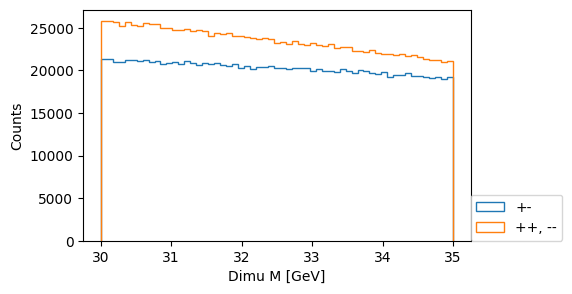

In [11]:
plt.figure(figsize = (5,3))
    
start = 30
stop = 35

 
plt.hist(all_data["dimu_mass"], bins = np.linspace(start, stop, 60), 
        histtype = "step", label = "+-")

plt.hist(all_data["dimu_mass_samesign"], bins = np.linspace(start, stop, 60), 
        histtype = "step", label = "++, --")

#plt.axvline(0.547)

plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0))
plt.show()